In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# import the csv file
data = pd.read_csv('../data/Week2_challenge_data_source(CSV).csv')

In [9]:
pd.set_option('display.max_columns', None)
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.310000e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.080000e+14,3.366496e+10,3.550000e+13,9.16E+15,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.310000e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.080000e+14,3.368185e+10,3.580000e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.310000e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.080000e+14,3.376063e+10,3.530000e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.310000e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.080000e+14,3.375034e+10,3.540000e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.310000e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.080000e+14,3.369980e+10,3.540000e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [11]:
# Replace missing values with the mean of their respective columns
# Calculate means only for numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


In [22]:
# Task 3.1
# Step 1: Group the data by user ('MSISDN/Number')
aggregated_data = data.groupby('MSISDN/Number').agg(
    # Step 2: Count the number of xDR sessions per user
    TCP_DL_Retransmission=('TCP DL Retrans. Vol (Bytes)','sum'),
    
    # Step 3: Calculate the total session duration per user
    TCP_UL_Retransmission=('TCP UL Retrans. Vol (Bytes)','sum'),
    
    # Step 4: Sum the total downloaded data per user
    RTT_DL=('Avg RTT DL (ms)','sum'),
    
    RTT_UL=('Avg RTT UL (ms)','sum'),
    Total_UL = ('Total UL (Bytes)','sum'),
    Total_DL = ('Total DL (Bytes)','sum'),
    Handset_Type=('Handset Type','count'),
    # Step 5: Sum the total uploaded data per user
    
)

# Step 6: Add a new column for total data volume (DL + UL)
aggregated_data['Total_Data_Volume'] = aggregated_data['Total_UL'] + aggregated_data['Total_DL']
aggregated_data['Total RTT']= aggregated_data['RTT_DL'] + aggregated_data['RTT_UL']
aggregated_data['Total TCP']= aggregated_data['TCP_DL_Retransmission'] + aggregated_data['TCP_UL_Retransmission']
aggregated_data['Throughput'] = aggregated_data['Total_Data_Volume']/aggregated_data['Total RTT']
aggregated_data['Average_TCP_retrans'] = (aggregated_data['TCP_DL_Retransmission'] + aggregated_data['TCP_UL_Retransmission'])/2

aggregated_data['Average_RTT'] = (aggregated_data['RTT_DL'] + aggregated_data['RTT_UL'])/2

aggregated_data['Average Throughput'] = aggregated_data['Throughput'].mean()
# Step 7: Reset the index to turn the grouped data back into a DataFrame
aggregated_data = aggregated_data.reset_index()

In [23]:
aggregated_data.head()

,MSISDN/Number,TCP_DL_Retransmission,TCP_UL_Retransmission,RTT_DL,RTT_UL,Total_UL,Total_DL,Handset_Type,Total_Data_Volume,Total RTT,Total TCP,Throughput,Average_TCP_retrans,Average_RTT,Average Throughput
0,3.360100e+10,2.080991e+07,759658.664811,46.000000,0.000000,36053108.0,8.426375e+08,1,8.786906e+08,46.000000,2.156957e+07,1.910197e+07,1.078479e+07,23.000000,inf
1,3.360100e+10,2.080991e+07,759658.664811,30.000000,1.000000,36104459.0,1.207552e+08,1,1.568596e+08,31.000000,2.156957e+07,5.059988e+06,1.078479e+07,15.500000,inf
2,3.360100e+10,2.080991e+07,759658.664811,109.795706,17.662883,39306820.0,5.566597e+08,1,5.959665e+08,127.458589,2.156957e+07,4.675766e+06,1.078479e+07,63.729294,inf
3,3.360101e+10,1.066000e+03,759658.664811,69.000000,15.000000,20327526.0,4.019932e+08,1,4.223207e+08,84.000000,7.607247e+05,5.027627e+06,3.803623e+05,42.000000,inf
4,3.360101e+10,3.015954e+07,780860.664811,114.000000,5.000000,94280527.0,1.363130e+09,2,1.457411e+09,119.000000,3.094040e+07,1.224715e+07,1.547020e+07,59.500000,inf


In [24]:
# top, bottom and most frequent tcp and rtt
# Top 10 TCP values
top_tcp = aggregated_data['Total TCP'].nlargest(10)

# Bottom 10 TCP values
bottom_tcp = aggregated_data['Total TCP'].nsmallest(10)

# Most frequent TCP values
most_frequent_tcp = aggregated_data['Total TCP'].value_counts().nlargest(10)

# Top 10 RTT values
top_rtt = aggregated_data['Total RTT'].nlargest(10)

# Bottom 10 RTT values
bottom_rtt = aggregated_data['Total RTT'].nsmallest(10)

# Most frequent RTT values
most_frequent_rtt = aggregated_data['Total RTT'].value_counts().nlargest(10)

# Display results
print("Top 10 TCP values:")
print(top_tcp)

print("\nBottom 10 TCP values:")
print(bottom_tcp)

print("\nMost Frequent TCP values:")
print(most_frequent_tcp)

print("\nTop 10 RTT values:")
print(top_rtt)

print("\nBottom 10 RTT values:")
print(bottom_rtt)

print("\nMost Frequent RTT values:")
print(most_frequent_rtt)

Top 10 TCP values:
106853    1.810492e+10
66860     8.354209e+09
34123     7.941860e+09
42366     7.374899e+09
94681     6.043978e+09
98213     5.879989e+09
25774     5.593366e+09
51638     5.566929e+09
70913     5.195785e+09
99929     5.179459e+09
Name: Total TCP, dtype: float64

Bottom 10 TCP values:
23472      97.0
6359      128.0
96977     129.0
13546     134.0
2177      143.0
25863     176.0
102198    176.0
105775    177.0
78100     179.0
89395     182.0
Name: Total TCP, dtype: float64

Most Frequent TCP values:
Total TCP
2.156957e+07    47125
4.313915e+07     7468
6.470872e+07     1032
2.081121e+07      363
8.627829e+07      252
2.081124e+07      167
7.609887e+05      145
4.238078e+07       82
2.081123e+07       81
7.597507e+05       78
Name: count, dtype: int64

Top 10 RTT values:
106853    329526.164724
47983      96924.000000
41944      64670.000000
80249      54848.000000
85683      46021.000000
96414      37084.000000
70142      36304.000000
93844      27278.000000
1713     

Average Throughput per Handset Type:
Handset_Type
1               inf
2      8.560746e+06
3      7.724151e+06
4      6.496244e+06
5      5.409289e+06
6      5.928394e+06
7      6.079830e+06
8      5.768349e+06
9      6.026338e+06
10     5.346563e+06
11     4.229859e+06
12     5.126170e+06
13     9.609020e+05
15     5.795451e+06
16     7.148296e+06
17     8.940636e+06
18     6.063252e+06
494    1.613665e+06
Name: Throughput, dtype: float64

Average TCP Retransmissions per Handset Type:
Handset_Type
1      2.030851e+07
2      4.226530e+07
3      7.095600e+07
4      1.015978e+08
5      1.820199e+08
6      1.569838e+08
7      8.656596e+07
8      1.452965e+08
9      1.072128e+08
10     8.284023e+07
11     1.303123e+08
12     1.464312e+08
13     3.256215e+07
15     2.087799e+08
16     8.964743e+07
17     1.983003e+08
18     2.368500e+08
494    1.810492e+10
Name: Total TCP, dtype: float64


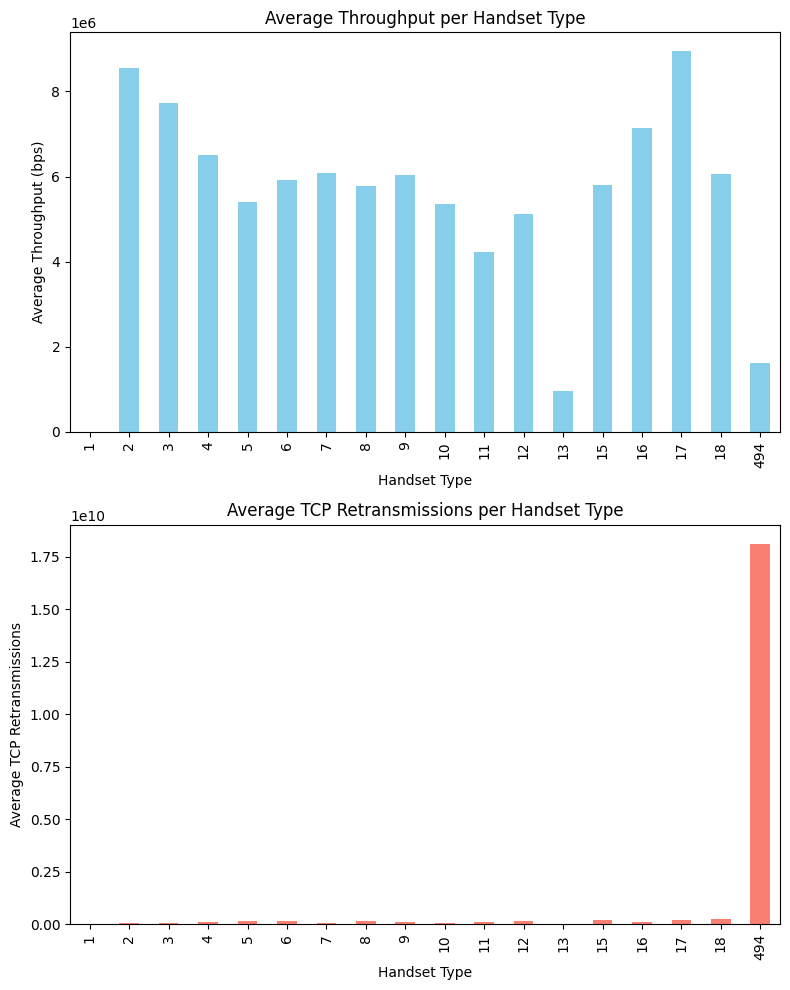

In [28]:
# Calculate average throughput per handset type
avg_throughput_per_handset = aggregated_data.groupby('Handset_Type')['Throughput'].mean()

# Calculate average TCP retransmissions per handset type
avg_retransmissions_per_handset = aggregated_data.groupby('Handset_Type')['Total TCP'].mean()

# Display the results
print("Average Throughput per Handset Type:")
print(avg_throughput_per_handset)

print("\nAverage TCP Retransmissions per Handset Type:")
print(avg_retransmissions_per_handset)

# Visualize the results
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot average throughput
avg_throughput_per_handset.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Average Throughput per Handset Type')
axs[0].set_ylabel('Average Throughput (bps)')
axs[0].set_xlabel('Handset Type')

# Plot average TCP retransmissions
avg_retransmissions_per_handset.plot(kind='bar', ax=axs[1], color='salmon')
axs[1].set_title('Average TCP Retransmissions per Handset Type')
axs[1].set_ylabel('Average TCP Retransmissions')
axs[1].set_xlabel('Handset Type')

plt.tight_layout()
plt.show()

In [ ]:
#k-means cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(aggregated_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
aggregated_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Display the DataFrame with cluster labels
print(aggregated_data)